In [1]:
import numpy as np
import matplotlib.pyplot as plt
from h5py import File
from scipy.stats import spearmanr

import csiborgtools

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

In [3]:
reader = csiborgtools.read.CSiBORG2Field(17417, "main")

In [5]:
density = reader.density_field("SPH", 1024)

In [ ]:
def smoothen_field(field, smooth_scale, boxsize, threads=1, make_copy=False):
    """
    Smooth a field with a Gaussian filter.
    """
    W_k = SL.FT_filter(boxsize, smooth_scale, field.shape[0], "Gaussian",
                       threads)

    if make_copy:
        field = numpy.copy(field)

    return SL.field_smoothing(field, W_k, threads)


In [8]:
slabA = density[512, ...]

density_smoothed = csiborgtools.field.smoothen_field(density, 2, 676.6, threads=4, make_copy=True)
slabB = density_smoothed[512, ...]

density_smoothed = csiborgtools.field.smoothen_field(density, 8, 676.6, threads=4, make_copy=True)
slabC = density_smoothed[512, ...]

In [11]:
np.savez("./smoothed_field.npz", smooth_0=slabA, smooth_2=slabB, smooth8=slabC)

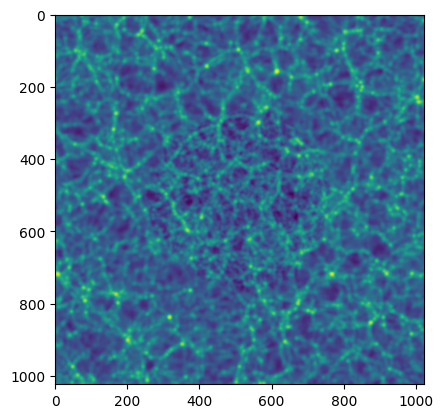

In [12]:
plt.figure()
plt.imshow(np.log10(slabB))
plt.show()

In [3]:
nsa_alfalfa = csiborgtools.SDSSxALFALFA()()
nsa = csiborgtools.SDSS()()

/mnt/users/rstiskalek/csiborgtools/csiborgtools/read/obs.py:367: UserWarning: Key `IN_DR7_LSS` found in both `routine_keys` and `fits_keys`. Returning `routine_keys` value.
  warn(f"Key `{key}` found in both `routine_keys` and `fits_keys`. "


In [14]:
fval1_cb2, smooth_scales = csiborgtools.summary.read_interpolated_field(
    nsa_alfalfa, "csiborg2_random", "density", "SPH", 1024, paths)
fval2_cb2, smooth_scales = csiborgtools.summary.read_interpolated_field(
    nsa_alfalfa, "csiborg2_main", "density", "SPH", 1024, paths)


Reading fields: 100%|██████████| 20/20 [00:00<00:00, 27.93it/s]


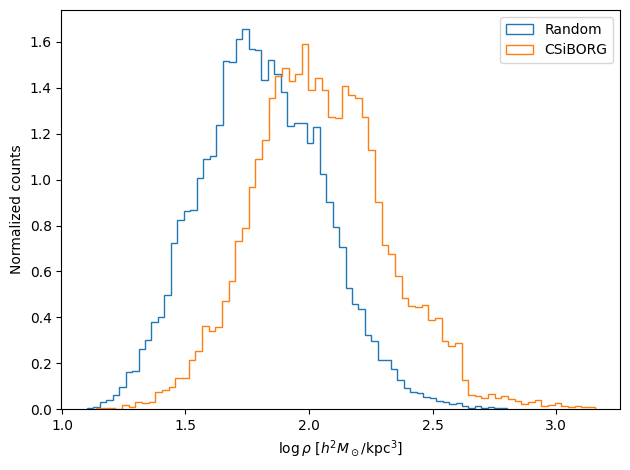

In [21]:
plt.figure()
plt.hist(np.log10(fval1_cb2[0, :, 2]), bins="auto", density=1, histtype="step",
         label="Random")
plt.hist(np.log10(fval2_cb2[10, :, 2]), bins="auto", density=1, histtype="step",
         label="CSiBORG")
# plt.yscale("log")
plt.legend()
plt.xlabel(r"$\log \rho ~ [h^2 M_\odot / \mathrm{kpc}^3]$")
plt.ylabel("Normalized counts")
plt.tight_layout()
plt.savefig("../plots/test_samples.png", dpi=450)
plt.show()

In [27]:
fval_rand, smooth_scales = csiborgtools.summary.read_interpolated_field(survey, "csiborg2_random", "density", "SPH", 1024, paths)

Reading fields: 100%|██████████| 20/20 [00:42<00:00,  2.10s/it]


In [51]:
survey.keys

['SERSIC_ABSMAG_F',
 'SERSIC_ABSMAG_N',
 'SERSIC_ABSMAG_u',
 'SERSIC_ABSMAG_g',
 'SERSIC_ABSMAG_r',
 'SERSIC_ABSMAG_i',
 'SERSIC_ABSMAG_z',
 'ELPETRO_ABSMAG_F',
 'ELPETRO_ABSMAG_N',
 'ELPETRO_ABSMAG_u',
 'ELPETRO_ABSMAG_g',
 'ELPETRO_ABSMAG_r',
 'ELPETRO_ABSMAG_i',
 'ELPETRO_ABSMAG_z',
 'SERSIC_APPMAG_F',
 'SERSIC_APPMAG_N',
 'SERSIC_APPMAG_u',
 'SERSIC_APPMAG_g',
 'SERSIC_APPMAG_r',
 'SERSIC_APPMAG_i',
 'SERSIC_APPMAG_z',
 'ELPETRO_APPMAG_F',
 'ELPETRO_APPMAG_N',
 'ELPETRO_APPMAG_u',
 'ELPETRO_APPMAG_g',
 'ELPETRO_APPMAG_r',
 'ELPETRO_APPMAG_i',
 'ELPETRO_APPMAG_z',
 'SERSIC_COL_FF',
 'SERSIC_COL_FN',
 'SERSIC_COL_Fu',
 'SERSIC_COL_Fg',
 'SERSIC_COL_Fr',
 'SERSIC_COL_Fi',
 'SERSIC_COL_Fz',
 'SERSIC_COL_NF',
 'SERSIC_COL_NN',
 'SERSIC_COL_Nu',
 'SERSIC_COL_Ng',
 'SERSIC_COL_Nr',
 'SERSIC_COL_Ni',
 'SERSIC_COL_Nz',
 'SERSIC_COL_uF',
 'SERSIC_COL_uN',
 'SERSIC_COL_uu',
 'SERSIC_COL_ug',
 'SERSIC_COL_ur',
 'SERSIC_COL_ui',
 'SERSIC_COL_uz',
 'SERSIC_COL_gF',
 'SERSIC_COL_gN',
 'SERSIC_COL

In [90]:
col = np.log10(survey["SERSIC_B300"])

/mnt/zfsusers/rstiskalek/csiborgtools/csiborgtools/read/obs.py:374: UserWarning: Returning a FITS property `SERSIC_B300`. Be careful about little h!
  warn(f"Returning a FITS property `{key}`. "


In [91]:
fval.shape

(20, 17737, 5)

8.0
MAIN  SignificanceResult(statistic=0.01800564415653568, pvalue=0.01648383065884433)
RAND  SignificanceResult(statistic=-0.09834925186515843, pvalue=2.2430402522333184e-39)


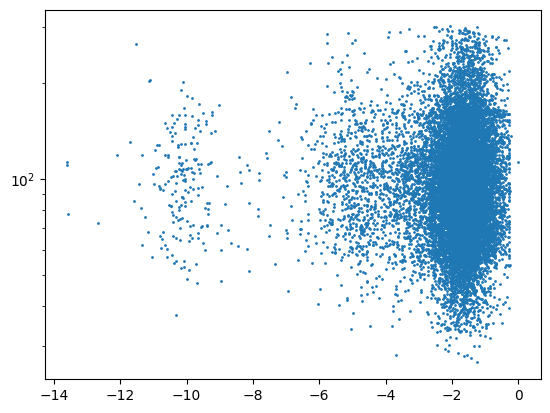

In [96]:
k = 3
n = 5
print(smooth_scales[k])
print("MAIN ", spearmanr(col, fval[n, :, k]))
print("RAND ", spearmanr(col, fval_rand[n, :, k]))

plt.figure()
plt.scatter(col, fval[n, :, k], s=1)
# plt.scatter(col, fval_rand[n, :, k], s=1)
plt.yscale("log")
plt.show()

MAIN  SignificanceResult(statistic=0.01727582463129473, pvalue=0.021402398915955124)
RAND  SignificanceResult(statistic=0.02077892643371117, pvalue=0.00564970605187618)


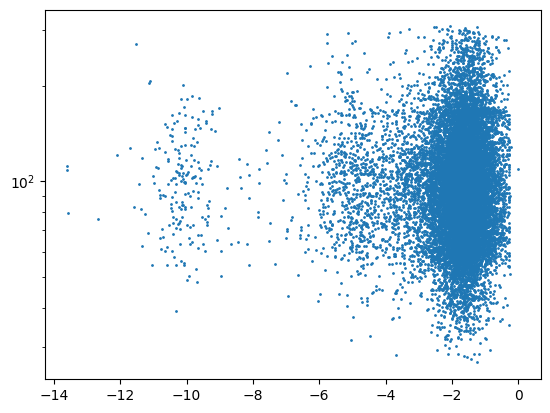

In [100]:
k = 3
y1 = np.mean(fval[:, :, k], axis=0)
y2 = np.mean(fval_rand[:, :, k], axis=0)


print("MAIN ", spearmanr(col, y1))
print("RAND ", spearmanr(col, y2))

plt.figure()
plt.scatter(col, y1, s=1)
plt.yscale("log")
plt.show()

In [10]:
survey.selection_mask.shape

(22478,)

In [ ]:
paths.field_interpolated()

In [4]:
radvel_path = paths.field("radvel", "SPH", 1024, 16217, "csiborg2_main")

In [9]:
d = np.load(radvel_path)

In [8]:
!du -h /mnt/extraspace/rstiskalek/csiborg_postprocessing/environment/radvel_csiborg2_main_SPH_16217_1024.npy

4.1G	/mnt/extraspace/rstiskalek/csiborg_postprocessing/environment/radvel_csiborg2_main_SPH_16217_1024.npy


In [5]:
# x1 = d["val"]

In [7]:
x2 = d["val"]

In [22]:
d["smooth_scales"]

array([ 0.,  2.,  4.,  8., 16.])

In [29]:
k = -1

m = np.isfinite(x1[:, k]) & np.isfinite(x2[:, k])

SignificanceResult(statistic=0.9946039397587731, pvalue=0.0)


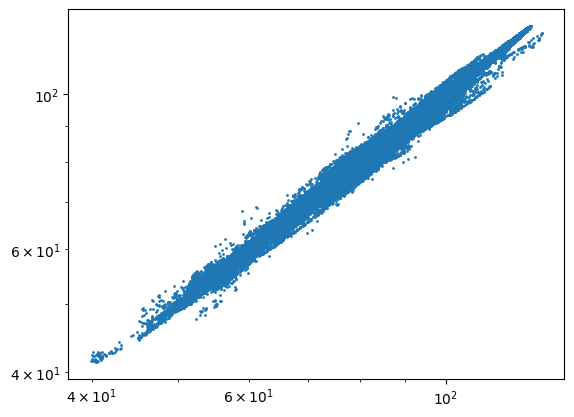

In [30]:
print(spearmanr(x1[m, k], x2[m, k]))

plt.figure()
plt.scatter(x1[m, k], x2[m, k], s=1)
plt.xscale("log")
plt.yscale("log")
plt.show()

array([413.8776  ,  36.502567,  42.72512 , ...,  86.33546 ,  46.866375,
        16.672348], dtype=float32)

In [9]:
x1.shape

(641409, 5)

In [4]:
field.density_field("SPH", 1024)

array([[[38.309074, 37.35447 , 33.675297, ..., 38.631912, 37.806564,
         38.30662 ],
        [36.995125, 35.11136 , 31.615524, ..., 41.488594, 39.508347,
         38.271282],
        [35.551605, 32.419254, 28.316347, ..., 44.668957, 41.425102,
         38.46228 ],
        ...,
        [44.0867  , 46.94581 , 47.402313, ..., 38.326492, 38.893078,
         40.331207],
        [39.54499 , 39.829464, 38.81296 , ..., 36.481358, 36.73762 ,
         37.66062 ],
        [38.683113, 38.04618 , 35.1861  , ..., 36.864704, 36.749477,
         37.77259 ]],

       [[39.680145, 39.896065, 37.5201  , ..., 35.309006, 35.451256,
         37.65782 ],
        [38.184814, 37.705723, 34.6373  , ..., 38.367054, 37.28385 ,
         37.66665 ],
        [36.350132, 34.192383, 30.708448, ..., 42.486446, 39.748688,
         37.757904],
        ...,
        [48.202843, 51.6801  , 54.201912, ..., 37.41573 , 39.070263,
         41.48212 ],
        [41.606823, 44.06209 , 46.2296  , ..., 33.731186, 35.463955,
   

In [206]:
mreader = csiborgtools.read.CSiBORG2MergerTreeReader(16517, "main")

Creating group to tree ID mapping...


In [238]:
cat["dist"][4]

136.42772691506084

In [251]:
d = mreader.main_progenitor(3000)

In [252]:
np.max(d["MaxNextProgenitorMass"] / d["MainProgenitorMass"])

0.07736389817838397

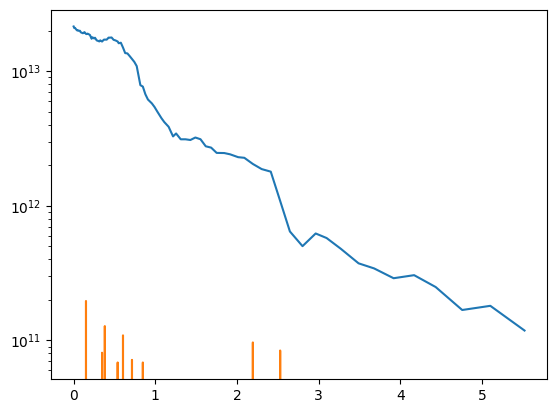

In [253]:
plt.figure()
plt.plot(d["Redshift"], d["MainProgenitorMass"])
plt.plot(d["Redshift"], d["MaxNextProgenitorMass"])


plt.yscale("log")

plt.show()

In [202]:
n = 0

main_progenitor = tree["TreeMainProgenitor"]
next_progenitor = tree["TreeNextProgenitor"]
snapnum = tree["SnapNum"]

for i in range(5):

    print(i)
    next_progenitor
    # print(main_progenitor[n], snapnum[main_progenitor[n]])
    # print(next_progenitor[n], snapnum[next_progenitor[n]])
    print("")
    
    
    n = main_progenitor[n]

0
702 98
-1 7

1
1415 97
1075 98

2
2142 96
1902 97

3
2887 95
2602 96

4
3642 94
3262 95



In [180]:
# z, y = mreader.fof_progenitor(30)
d = mreader.main_progenitor(30)

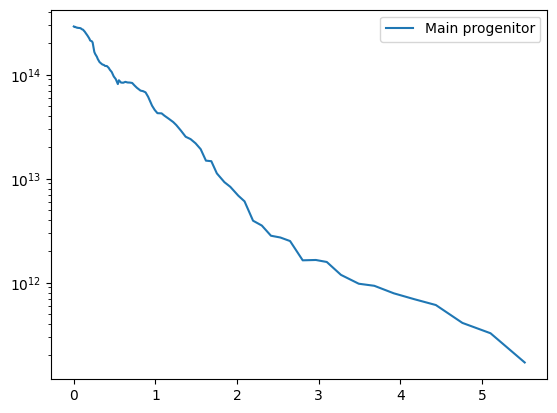

In [181]:
plt.figure()
plt.plot(d["Redshift"], d["MainProgenitorMass"], label="Main progenitor")
# plt.plot(z, y, label="FoF group")
plt.legend()
plt.yscale("log")
plt.show()

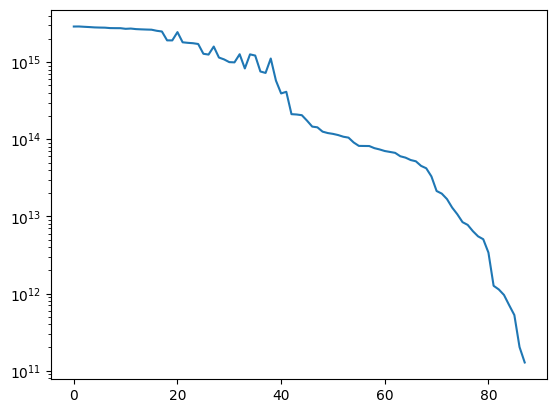

In [164]:
plt.figure()
plt.plot(y)
plt.yscale("log")
plt.show()

In [132]:
cat = csiborgtools.read.CSiBORG2Catalogue(16517, 99, "main")

In [136]:
cat["totmass"]

array([2.9051551e+15, 1.6921947e+15, 1.3596260e+15, ..., 9.9620782e+10,
       9.9620782e+10, 9.9620782e+10], dtype=float32)

In [131]:
d1 = mreader.fof_progenitor(1)

0 99
383 98
776 97
1176 96
1588 95
2012 94
2447 93
2888 92
3338 91
3788 90
4246 89
4718 88
5198 87
5683 86
6169 85
6657 84
7146 83
7633 82
8130 81
8651 80
9173 79
9723 78
10286 77
10856 76
11443 75
12041 74
12650 73
13267 72
13899 71
14536 70
15193 69
15866 68
16540 67
17215 66
17914 65
18637 64
19377 63
20128 62
20899 61
21685 60
22491 59
23311 58
24159 57
25150 56
26026 55
26897 54
27806 53
28738 52
29568 51
30531 50
31514 49
32513 48
33520 47
34554 46
35609 45
36684 44
37773 43
38860 42
39967 41
41089 40
42234 39
43403 38
44575 37
45766 36
46974 35
48177 34
49394 33
50614 32
51855 31
53100 30
54360 29
55601 28
56820 27
58039 26
59241 25
60419 24
61581 23
62730 22
63774 21
64754 20
65636 19
66424 18
67096 17
67683 16
68154 15
68525 14
68842 13
69008 12
69119 11
69177 10


In [ ]:
d1["Group_M_Crit200"]

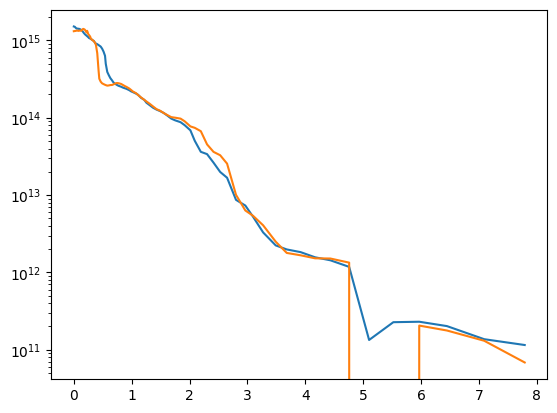

In [129]:
plt.figure()
plt.plot(d1["Redshift"], d1["MainProgenitorMass"])
# plt.plot(z1, m1)
plt.yscale("log")
plt.show()

In [22]:
f = h5py.File(paths.trees(16517, "csiborg2_main"), 'r')
print(f.keys()) 

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'TreeHalos', 'TreeTable', 'TreeTimes']>


In [31]:
f["TreeHalos"].keys()

<KeysViewHDF5 ['GroupNr', 'Group_M_Crit200', 'SnapNum', 'SubhaloHalfmassRad', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloMass', 'SubhaloNr', 'SubhaloPos', 'SubhaloSpin', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'TreeDescendant', 'TreeFirstDescendant', 'TreeFirstHaloInFOFgroup', 'TreeFirstProgenitor', 'TreeID', 'TreeIndex', 'TreeMainProgenitor', 'TreeNextDescendant', 'TreeNextHaloInFOFgroup', 'TreeNextProgenitor', 'TreeProgenitor']>

In [35]:
offset = f["TreeTable/StartOffset"][:]
length = f["TreeTable/Length"][:]


groupnr = f["TreeHalos/GroupNr"][:]
snapnum = f["TreeHalos/SnapNum"][:]
treeid = f["TreeHalos/TreeID"][:]

treeid[mask][groupnr[mask] == 300000]


In [48]:
treeid = f["TreeHalos/TreeID"][:]

In [43]:
mask = snapnum==99

In [58]:
treeid[mask][groupnr[mask] == 300000]

array([279606])

In [41]:
cat

<CSiBORG2Catalogue> (nsim = 16517, nsnap = 99, nhalo = 573522)

In [39]:

for n in range(3):
    i = offset[n]
    j = i + length[n]
    
    
    m = snapnum[i:j] == 99
    
    

148
85
68


In [24]:
f["TreeHalos/GroupNr"]

<HDF5 dataset "GroupNr": shape (54136877,), type "<i8">

In [136]:
f["TreeTable/StartOffset"][:]

array([       0,   118794,   187990, ..., 54136874, 54136875, 54136876])

In [137]:
f["TreeTable/Length"][:]

array([118794,  69196,  53723, ...,      1,      1,      1], dtype=int32)

In [138]:
for key in f["TreeHalos"].keys():
    print(key)

GroupNr
Group_M_Crit200
SnapNum
SubhaloHalfmassRad
SubhaloIDMostbound
SubhaloLen
SubhaloMass
SubhaloNr
SubhaloPos
SubhaloSpin
SubhaloVel
SubhaloVelDisp
SubhaloVmax
SubhaloVmaxRad
TreeDescendant
TreeFirstDescendant
TreeFirstHaloInFOFgroup
TreeFirstProgenitor
TreeID
TreeIndex
TreeMainProgenitor
TreeNextDescendant
TreeNextHaloInFOFgroup
TreeNextProgenitor
TreeProgenitor


In [150]:
cat["GroupContamination"]

array([0.0044236 , 0.02276927, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [147]:
n = 0
tot = 0
while True:
    print(n, snap[n])

    if n == -1:
        break
    tot += m[n]
    
    n = nexthalo[n]


0 99
1 99
2 99
3 99
4 99
5 99
6 99
7 99
8 99
9 99
10 99
11 99
12 99
13 99
14 99
15 99
16 99
17 99
18 99
19 99
20 99
21 99
22 99
23 99
24 99
25 99
26 99
27 99
28 99
29 99
30 99
31 99
32 99
33 99
34 99
35 99
36 99
37 99
38 99
39 99
40 99
41 99
42 99
43 99
44 99
45 99
46 99
47 99
48 99
49 99
50 99
51 99
52 99
53 99
54 99
55 99
56 99
57 99
58 99
59 99
60 99
61 99
62 99
63 99
64 99
65 99
66 99
67 99
68 99
69 99
70 99
71 99
72 99
73 99
74 99
75 99
76 99
77 99
78 99
79 99
80 99
81 99
82 99
83 99
84 99
85 99
86 99
87 99
88 99
89 99
90 99
91 99
92 99
93 99
94 99
95 99
96 99
97 99
98 99
99 99
100 99
101 99
102 99
103 99
104 99
105 99
106 99
107 99
108 99
109 99
110 99
111 99
112 99
113 99
114 99
115 99
116 99
117 99
118 99
119 99
120 99
121 99
122 99
123 99
124 99
125 99
126 99
127 99
128 99
129 99
130 99
131 99
132 99
133 99
134 99
135 99
136 99
137 99
138 99
139 99
140 99
141 99
142 99
143 99
144 99
145 99
146 99
147 99
148 99
149 99
150 99
151 99
152 99
153 99
154 99
155 99
156 99
157 99
158 

In [141]:
cat["totmass"]

array([2.9051551e+15, 1.6921947e+15, 1.3596260e+15, ..., 9.9620782e+10,
       9.9620782e+10, 9.9620782e+10], dtype=float32)

In [145]:
tot * 1e10 / 2.9051551e+15

0.9089129421107761

In [118]:
f["TreeHalos/GroupNr"][:400]

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [108]:
x = f["TreeHalos/TreeMainProgenitor"][:73895]
s = f["TreeHalos/SnapNum"][:73895]
x

array([  458,   765,   459, ...,    -1, 73894,    -1], dtype=int32)

In [102]:
y = f["TreeHalos/TreeFirstProgenitor"][:73895]
y

array([  458,   765,   459, ...,    -1, 73894,    -1], dtype=int32)

In [104]:
np.where(x != y)

(array([ 5267,  8923, 31233, 34714, 36776, 57800, 57826, 64048, 67037,
        67200, 68473, 69140, 69301, 70258, 72159]),)

In [62]:
cat["Group_M_Crit200"]

array([1.4632333e+05, 8.7416617e+04, 1.7587738e+04, ..., 8.7168188e+00,
       7.7828741e+00, 7.1602445e+00], dtype=float32)

In [50]:
cat["totmass"] * 1e-10

array([1.8495028e+05, 1.2342685e+05, 1.0729690e+05, ..., 9.9620781e+00,
       9.9620781e+00, 9.9620781e+00], dtype=float32)

In [75]:
np.where(f["TreeHalos"]["SnapNum"][:1000] == 98)

(array([458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
        471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
        484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496,
        497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
        510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522,
        523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535,
        536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548,
        549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561,
        562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574,
        575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587,
        588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600,
        601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613,
        614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626,
        627, 628, 629, 630, 631, 632, 633, 634, 635

In [77]:
f["TreeHalos"]["TreeFirstHaloInFOFgroup"][:1000][330]

324

In [44]:
f["TreeHalos/SnapNum"][73895:73895+100]

array([99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99],
      dtype=int32)

In [5]:
snap_final = csiborgtools.read.CSiBORG2Snapshot(1, 99, "varysmall")
snap_init = csiborgtools.read.CSiBORG2Snapshot(1, 0, "varysmall")

In [6]:
# print("Loading final")
# pid_final = snap_final.particle_ids()

# print("Loading init")
# pid_init = snap_init.particle_ids()



In [23]:
hid = 7
pos_final = snap_final.halo_coordinates(hid)

In [24]:
pos_init = snap_init.halo_coordinates(hid)

In [25]:
pos_final.shape

(231277, 3)

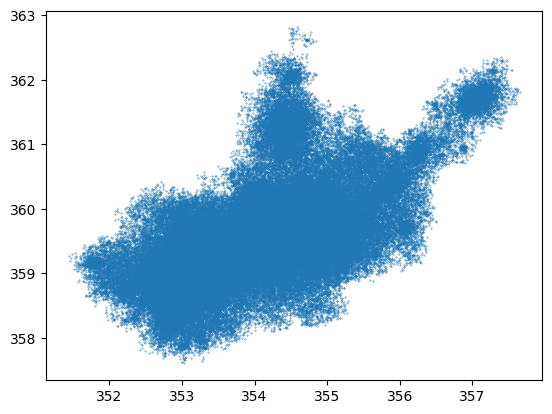

In [27]:
plt.figure()
# plt.scatter(pos_init[:,0], pos_init[:, 1], s=0.1)
plt.scatter(pos_final[:,0], pos_final[:, 1], s=0.1)

plt.show()

In [46]:
cat = csiborgtools.read.CSiBORG2Catalogue(15617, 99, "main", bounds={"dist": (None, 120)})

<KeysViewHDF5 ['GroupAscale', 'GroupFirstSub', 'GroupLen', 'GroupLenPrevMostBnd', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupOffsetType', 'GroupPos', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>
<KeysViewHDF5 ['GroupAscale', 'GroupFirstSub', 'GroupLen', 'GroupLenPrevMostBnd', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupOffsetType', 'GroupPos', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>


In [47]:
x = cat["dist"]
y = cat["GroupContamination"]

<KeysViewHDF5 ['GroupAscale', 'GroupFirstSub', 'GroupLen', 'GroupLenPrevMostBnd', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupOffsetType', 'GroupPos', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>
<KeysViewHDF5 ['GroupAscale', 'GroupFirstSub', 'GroupLen', 'GroupLenPrevMostBnd', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupOffsetType', 'GroupPos', 'GroupVel', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200']>


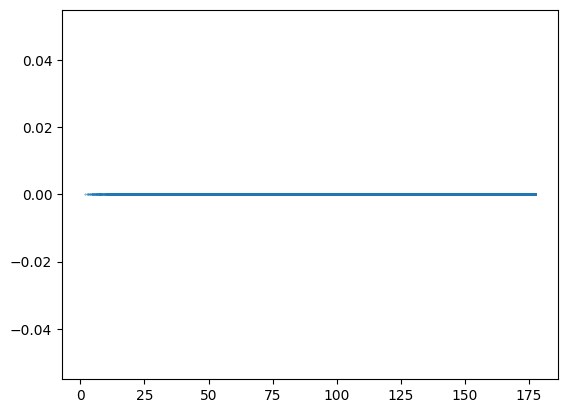

In [48]:
plt.figure()
plt.scatter(x / 0.676, y, s=0.1)
plt.show()

In [10]:
cat.keys()

['cartesian_pos',
 'spherical_pos',
 'dist',
 'cartesian_redshiftspace_pos',
 'spherical_redshiftspace_pos',
 'redshiftspace_dist',
 'cartesian_vel',
 'particle_offsetnpart',
 'totmass',
 'index',
 'lagpatch_coordinates',
 'lagpatch_radius']

In [56]:
len(cat)

168736

In [55]:
cat["m200c"]

AttributeError: 'CSiBORG1Catalogue' object has no attribute 'data'

In [46]:
cat["index"]

array([     1,      2,      3, ..., 168734, 168735, 168736], dtype=int32)

In [43]:
cat._read_fof_catalogue("xx")

ValueError: FoF catalogue key 'xx' not available. Available keys are: ['GroupOffset', 'index', 'm200c', 'totpartmass', 'x', 'y', 'z']

In [49]:
getattr(cat, "npart")

array([165, 341, 189, ..., 524, 281, 606], dtype=uint32)

In [42]:
cat["totmass"] / cat["npart"]

array([3.12599134e+09, 3.11626524e+09, 3.12360110e+09, ...,
       3.56968138e+09, 3.11820731e+09, 6.41428993e+09])

In [30]:
cat["cartesian_pos"]

array([[246.23767, 248.68051, 246.8038 ],
       [245.89716, 248.3562 , 246.68607],
       [251.61401, 249.80145, 251.0754 ],
       ...,
       [239.69035, 436.81116, 251.61401],
       [238.87607, 435.89465, 251.42436],
       [239.18134, 437.3216 , 250.3281 ]], dtype=float32)

In [31]:
cat._read_fof_catalogue("x")

<KeysViewHDF5 ['GroupOffset', 'index', 'm200c', 'totpartmass', 'x', 'y', 'z']>


array([246.23767, 245.89716, 251.61401, ..., 239.69035, 238.87607,
       239.18134], dtype=float32)

In [29]:
cat.cache_keys()

['spherical_pos', 'cartesian_pos']

In [37]:
x = np.arange(10)

In [41]:
np.vstack([x.reshape(-1, 1), x.reshape(-1, 1)]).shape

(20, 1)

In [45]:
np.hstack([x, x]).shape

(20,)

In [29]:
np.vstack([x, x]).shape

(38733704, 3)

In [11]:
x = snapshot.halo_coordinates(0)

ValueError: Halo `0` not found.

In [10]:
x

array([[396.24 , 662.408, 314.148],
       [398.16 , 661.776, 314.764],
       [398.04 , 660.472, 313.024],
       ...,
       [396.26 , 661.08 , 314.384],
       [396.052, 661.296, 313.964],
       [397.068, 662.008, 312.492]], dtype=float32)

In [23]:
x

array([3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e+09,
       3.0900434e+09, 3.0900434e+09, 3.0900434e+09, 3.0900434e

In [10]:
snapshot.hid2offset

In [16]:
d = {i: (j, k) for i, j, k in offset}

In [20]:
d[1]

(295030069, 295030234)

In [10]:
ids = snapshot.particle_ids()

In [3]:
from h5py import File


with File("/mnt/extraspace/rstiskalek/csiborg1/chain_7516/snapshot_00946.hdf5", 'r') as f:
    print(f.keys())


<KeysViewHDF5 ['Coordinates', 'Header', 'Masses', 'ParticleIDs', 'Velocities']>


In [9]:
ids

<bound method CSiBORG1Snapshot.particle_ids of <csiborgtools.read.snapshot.CSiBORG1Snapshot object at 0x7f924a96d9d0>>

In [27]:
d1["val"].shape

(22478, 7)

In [28]:
d2["val"].shape

(17737, 7)

In [22]:
surv = csiborgtools.SDSSxALFALFA()(apply_selection=True)

/mnt/zfsusers/rstiskalek/csiborgtools/csiborgtools/read/obs.py:368: UserWarning: Key `IN_DR7_LSS` found in both `routine_keys` and `fits_keys`. Returning `routine_keys` value.
  warn(f"Key `{key}` found in both `routine_keys` and `fits_keys`. "


In [25]:
surv.selection_mask.size

22478

In [1]:
x

NameError: name 'x' is not defined

In [8]:
d["val"].shape

(17737, 7)

In [43]:
paths.get_ics("quijote")

array([0, 1])

In [78]:
paths.get_snapshots(1, "quijote")

True


['ics', 4]

In [82]:
str("ICs").zfill(3)

'ICs'

In [80]:
paths.snapshot(980, 7444, "csiborg")

'/mnt/extraspace/rstiskalek/csiborg1/chain_7444/snapshot_00980.hdf5'

In [ ]:
with h5py.File("/mnt/extraspace/rstiskalek/quijote/fiducial_processed/chain_0/fof_004.hdf5", 'r') as f:
    print(f.keys())

In [5]:
pos0

array([[9.9994348e+02, 2.3538021e+01, 1.3582062e+01],
       [1.2109435e+02, 9.1827988e+01, 4.8249097e+02],
       [1.2107726e+02, 9.1833275e+01, 4.8052374e+02],
       ...,
       [9.9808612e+02, 9.7062708e+02, 9.3360345e+02],
       [2.6784971e-02, 9.7256281e+02, 9.3554065e+02],
       [9.9810071e+02, 9.6868726e+02, 9.3552893e+02]], dtype=float32)

In [ ]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

In [ ]:
Omega0 0.307000011205673
OmegaBaryon 0.0
OmegaLambda 0.693000018596649

In [26]:
box._omega_l

0.693000018596649

In [20]:
box.Om0

0.307000011205673

In [18]:
box.box2vel(1)

67682.75228061239

In [ ]:
2.654327164967911e+19

In [5]:
paths.get_ics("csiborg2_main")

array([15517, 15617, 15717, 15817, 15917, 16017, 16117, 16217, 16317,
       16417, 16517, 16617, 16717, 16817, 16917, 17117, 17217, 17317,
       17417])

In [11]:
paths.get_snapshots(15517, "csiborg2_main")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
!ls /mnt/extraspace/rstiskalek/csiborg2_main/chain_15517/output

bak-subhalo_treelink_000.hdf5	     snapshot-prevmostboundonly_045.hdf5
bak-subhalo_treelink_001.hdf5	     snapshot-prevmostboundonly_046.hdf5
bak-subhalo_treelink_002.hdf5	     snapshot-prevmostboundonly_047.hdf5
bak-subhalo_treelink_003.hdf5	     snapshot-prevmostboundonly_048.hdf5
bak-subhalo_treelink_004.hdf5	     snapshot-prevmostboundonly_049.hdf5
bak-subhalo_treelink_005.hdf5	     snapshot-prevmostboundonly_050.hdf5
bak-subhalo_treelink_006.hdf5	     snapshot-prevmostboundonly_051.hdf5
bak-subhalo_treelink_007.hdf5	     snapshot-prevmostboundonly_052.hdf5
bak-subhalo_treelink_008.hdf5	     snapshot-prevmostboundonly_053.hdf5
bak-subhalo_treelink_009.hdf5	     snapshot-prevmostboundonly_054.hdf5
bak-subhalo_treelink_010.hdf5	     snapshot-prevmostboundonly_055.hdf5
bak-subhalo_treelink_011.hdf5	     snapshot-prevmostboundonly_056.hdf5
bak-subhalo_treelink_012.hdf5	     snapshot-prevmostboundonly_057.hdf5
bak-subhalo_treelink_013.hdf5	     snapshot-prevmostboundonly_058.hdf5
bak-su

In [4]:
cat = csiborgtools.read.CSiBORGCatalogue(7444, paths, catalogue_name="halo_catalogue", halo_finder="FOF",
                                         bounds={"dist": (0, 50)})

2023-11-16 12:14:34.150916:   opening `/mnt/extraspace/rstiskalek/CSiBORG/processed_output/parts_FOF_07444.hdf5`.


In [6]:
d = np.load(paths.field("density", "PCS", 512, 7444, False, None))

In [12]:
over = d / d.mean() - 1

In [16]:
import Pk_library as PKL

In [18]:
Pk = PKL.Pk(over, 677.6, 0, "PCS", 1, True)


# 3D P(k)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D


Computing power spectrum of the field...
Time to complete loop = 8.22
Time taken = 15.66 seconds


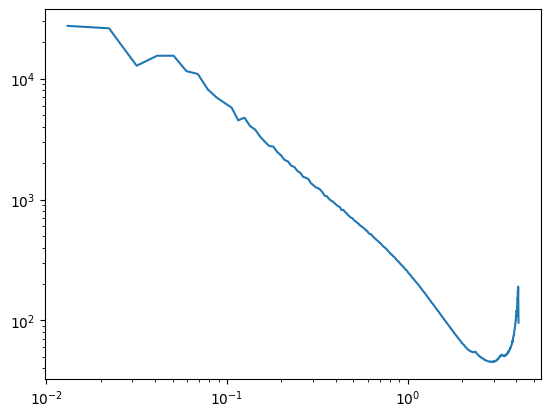

In [21]:
plt.figure()
plt.plot(k, Pk0, label='monopole')
plt.xscale('log')
plt.yscale('log')
plt.show()

/tmp/ipykernel_1249/2763035238.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(over[0, :, :] + 1))


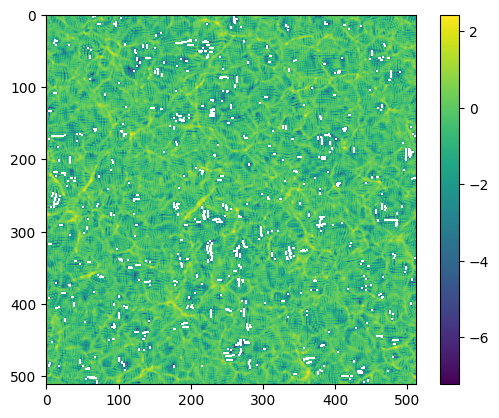

In [15]:
plt.figure()
plt.imshow(np.log10(over[0, :, :] + 1))
plt.colorbar()

plt.show()

In [6]:
pos = cat["snapshot_final/pos"]

In [8]:
pos = pos[:]

In [7]:
totmass = numpy.sum(cat["snapshot_final/mass"][:])

In [10]:
totmass / (677.7 * 1000)**3 / 0.3

284.507446985742

In [8]:
virgo = csiborgtools.virgo

print(virgo)
X = np.array([virgo["dist"], virgo["RA"], virgo["DEC"]]).reshape(-1, 3)


dist, indxs = cat.angular_neighbours(X, False, 20, radial_tolerance=5)
dist, indxs = dist[0], indxs[0]

{'RA': 186.75, 'DEC': 12.717, 'dist': 11.28}


In [7]:
dist

array([], dtype=float64)

In [308]:
k = np.argmax(cat["mtot"])

k = np.argsort(cat["mtot"])[::-1][8]

c = cat["cartesian_pos"][k]

print(np.log10(cat["mtot"][k]))

14.294649


In [309]:
indx1 = cat.select_in_box(c, 20)
pos1 = cat["cartesian_pos"][indx1]

indx2 = pcat.select_in_box(c, 20)
pos2 = pcat["cartesian_pos"][indx2]

m1 = cat["mtot"][indx1]
m2 = pcat["summed_mass"][indx2]

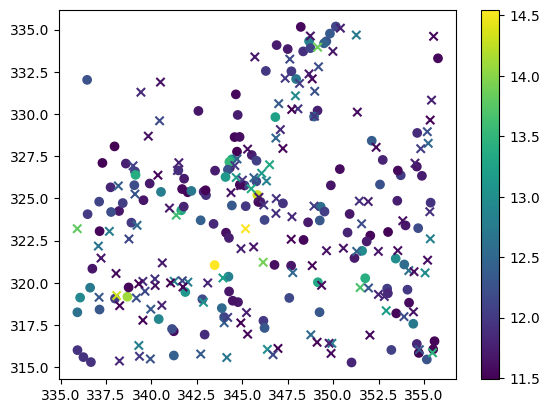

In [311]:
plt.figure()
plt.scatter(pos1[:, 0], pos1[:, 1], c=np.log10(m1))
plt.colorbar()
plt.scatter(pos2[:, 0], pos2[:, 1],  marker="x", c=np.log10(m2))

plt.show()

In [293]:
virgo = csiborgtools.virgo

print(virgo)
X = np.array([virgo["dist"], virgo["RA"], virgo["DEC"]]).reshape(-1, 3)


dist, indxs = cat.angular_neighbours(X, False, 20, radial_tolerance=5)
dist, indxs = dist[0], indxs[0]

{'RA': 195, 'DEC': 28, 'dist': 70.5}


In [294]:
print(cat["mtot"][indxs])

k = np.argmax(cat["mtot"][indxs])
kk = indxs[k]
dist[k], np.log10(cat["mtot"][indxs[k]]), cat["index"][indxs[k]]

[]


ValueError: attempt to get argmax of an empty sequence

In [234]:
print(np.argsort(pcat["summed_mass"])[::-1][:10])
 
k = 46519

[87053 61697 53097 80742 84525  4223 22315  1717 46519 23735]


In [163]:
np.log10(pcat["summed_mass"][k]), pcat["dist"][k], pcat["is_main"][k], pcat["index"][k]

(15.115513, 70.65002323342219, True, 11506838)

In [235]:
data = merger_reader.walk_main_progenitor(20520136, 951, True)

Clump 3947225 (193): : 24it [00:06,  3.58it/s] 


In [236]:
# pos, mass, x = csiborgtools.read.track_halo_manually(cats, 21344979, maxdist=5, max_dlogm=1)
hist = csiborgtools.read.track_halo_manually(cats, 20520136, maxdist=0.25, max_dlogm=0.5)

Tracking halo: 100%|██████████| 651/651 [00:53<00:00, 12.16it/s]


In [237]:
hist

array([(951., 275.3906 , 323.64114, 375.0767 , 1.6992810e+15,        nan),
       (950., 275.3763 , 323.63602, 375.09222, 1.6949284e+15, 0.02171533),
       (949.,       nan,       nan,       nan,           nan,        nan),
       (948.,       nan,       nan,       nan,           nan,        nan),
       (947.,       nan,       nan,       nan,           nan,        nan),
       (946., 275.3962 , 323.66205, 375.0974 , 1.6972969e+15, 0.03317323),
       (945., 275.38544, 323.63733, 375.10263, 1.6828855e+15, 0.02746497),
       (944.,       nan,       nan,       nan,           nan,        nan),
       (943., 275.3182 , 323.42926, 375.11832, 1.6848843e+15, 0.21922271),
       (942., 275.40613, 323.66183, 375.09247, 1.6838351e+15, 0.24997829),
       (941.,       nan,       nan,       nan,           nan,        nan),
       (940.,       nan,       nan,       nan,           nan,        nan),
       (939., 275.4062 , 323.67218, 375.10422, 1.6796080e+15, 0.01565495),
       (938., 275.41653, 

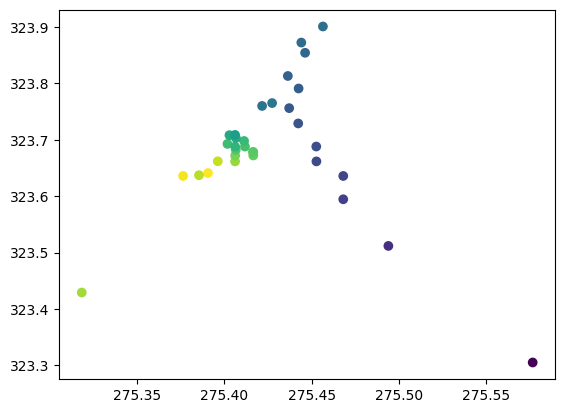

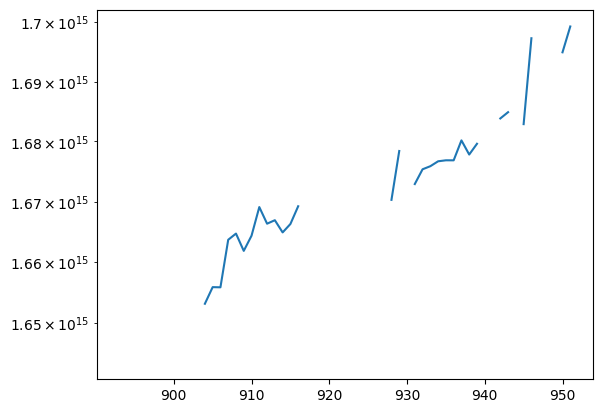

In [238]:
plt.figure()
plt.scatter(hist["x"], hist["y"], c=hist["snapshot_index"])
plt.show()

plt.figure()
plt.plot(hist["snapshot_index"], hist["mass"])
# m = data["desc_snapshot_index"] > 0
# plt.plot(data["desc_snapshot_index"][m], data["desc_mass"][m])
plt.yscale("log")
plt.show()

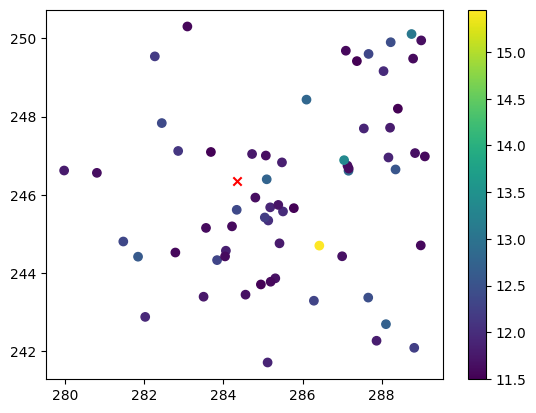

In [222]:
plt.figure()
plt.scatter(pos[:, 0], pos[:, 1], c=np.log10(mass))
plt.colorbar()

plt.scatter(x[0], x[1], c="r", marker='x')

plt.show()

In [47]:
hist

array([(951., 284.35236, 246.34824, 370.83707, 2.8412564e+15,        nan),
       (950.,       nan,       nan,       nan,           nan,        nan),
       (949.,       nan,       nan,       nan,           nan,        nan),
       (948.,       nan,       nan,       nan,           nan,        nan),
       (947.,       nan,       nan,       nan,           nan,        nan),
       (946.,       nan,       nan,       nan,           nan,        nan),
       (945.,       nan,       nan,       nan,           nan,        nan),
       (944.,       nan,       nan,       nan,           nan,        nan),
       (943.,       nan,       nan,       nan,           nan,        nan),
       (942.,       nan,       nan,       nan,           nan,        nan),
       (941.,       nan,       nan,       nan,           nan,        nan),
       (940.,       nan,       nan,       nan,           nan,        nan),
       (939.,       nan,       nan,       nan,           nan,        nan),
       (938.,       nan, 

In [27]:
data

array([(951., 2.8871637e+15, 284.3524 , 246.34824, 370.83704, 950., 2.8882882e+15, 2.8788946e+15, 9.3937321e+12, 0.00093918),
       (950., 2.8788946e+15, 286.42444, 244.69951, 373.20593, 949., 2.8756223e+15, 2.8672700e+15, 8.3523876e+12, 0.00110787),
       (949., 2.8672700e+15, 286.40372, 244.72537, 373.17398, 948., 3.8162037e+12, 1.4894010e+12, 2.3268027e+12, 0.81327796),
       (948., 1.4894010e+12, 286.77917, 242.59756, 372.9749 , 947.,           nan,           nan,           nan,        nan)],
      dtype=[('desc_snapshot_index', '<f4'), ('desc_mass', '<f4'), ('desc_x', '<f4'), ('desc_y', '<f4'), ('desc_z', '<f4'), ('prog_snapshot_index', '<f4'), ('prog_totmass', '<f4'), ('mainprog_mass', '<f4'), ('minprog_totmass', '<f4'), ('merger_ratio', '<f4')])

In [28]:
mladen = np.genfromtxt("/mnt/extraspace/rstiskalek/CSiBORG/cleaned_mtree/ramses_out_7444/mergertree_00951_halo-21344979.txt", skip_header=1) 

In [31]:
mladen

array([[ 9.5100000e+02, -6.0000000e-04,  2.1344979e+07,  4.0949790e+15,
         1.3323500e+13,  0.0000000e+00],
       [ 9.5000000e+02,  7.0000000e-04,  2.1390351e+07,  4.0832510e+15,
         7.5558290e+12,  4.2906940e+12],
       [ 9.4900000e+02,  2.1000000e-03,  2.1382973e+07,  4.0667630e+15,
         2.1738350e+12,  1.1263620e+12],
       [ 9.4800000e+02,  3.5000000e-03,  2.1405046e+07,  2.1124770e+12,
         0.0000000e+00,  0.0000000e+00]])

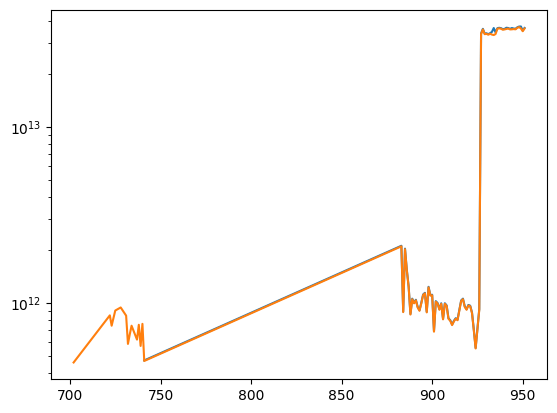

In [18]:
plt.figure()
plt.plot(data["desc_snapshot_index"], data["desc_mass"])
m = mladen[:, 0] > 700
plt.plot(mladen[:,0][m], (mladen[:,3][m] - mladen[:, 5][m]) * 0.7)

plt.yscale("log")
plt.show()

In [298]:
snaps = paths.get_snapshots(7468, "csiborg")

In [299]:
nsnaps = range(800, 944 + 1)
from tqdm import tqdm
cats = {}
for nsnap in tqdm(nsnaps):
    cats[nsnap] = csiborgtools.read.CSiBORGPHEWCatalogue(
        nsnap, 7468, paths, bounds={"dist": (None, 155.5), "is_main": True})

100%|██████████| 145/145 [01:46<00:00,  1.36it/s]


In [230]:
cats[944]["dist"][cats[944]["hid_to_array_index"][20467619]]

15.50197501793565

In [454]:
# hid = cats[944]["index"][np.argmax(cats[944]["summed_mass"])]
hid = 20467619

In [455]:
hist = csiborgtools.read.track_halo_manually(cats, hid)
# x, y = csiborgtools.read.track_halo_manually(cats, hid)

100%|██████████| 144/144 [00:00<00:00, 1348.89it/s]


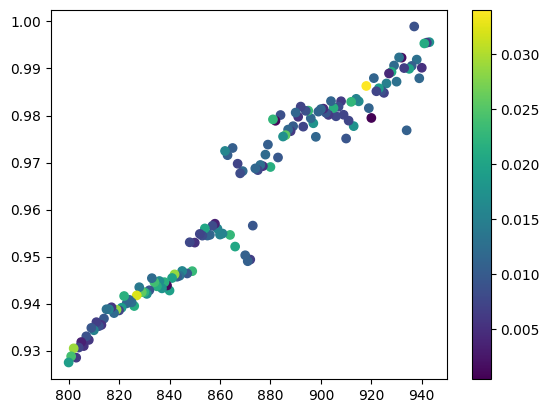

In [456]:
plt.figure()
plt.scatter(hist["snapshot_index"], hist["mass"] / hist["mass"][0], c=hist["desc_dist"])
plt.colorbar()
# plt.yscale("log")
plt.show()

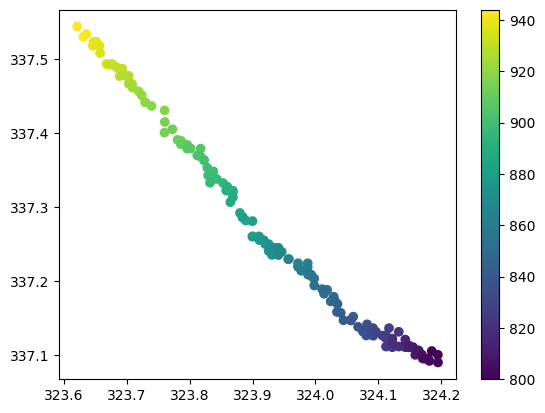

In [457]:
plt.figure()
plt.scatter(hist["x"], hist["y"], c=hist["snapshot_index"])
plt.colorbar()
plt.show()

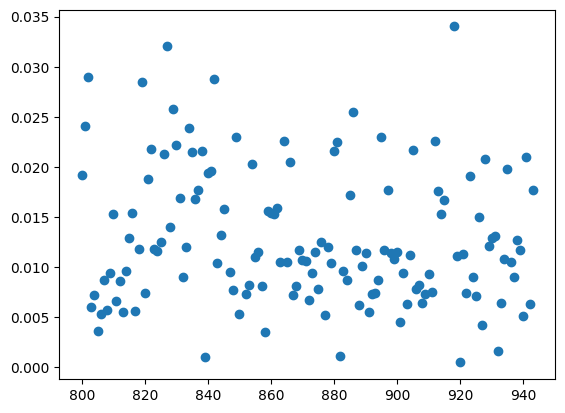

In [458]:
plt.figure()
plt.scatter(hist["snapshot_index"], hist["desc_dist"])

plt.show()

In [459]:
x = np.arange(len(pos_history))

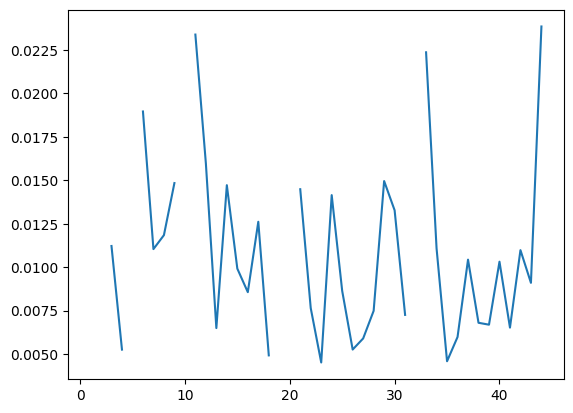

In [293]:
plt.figure()
plt.plot(dist_history)
plt.show()

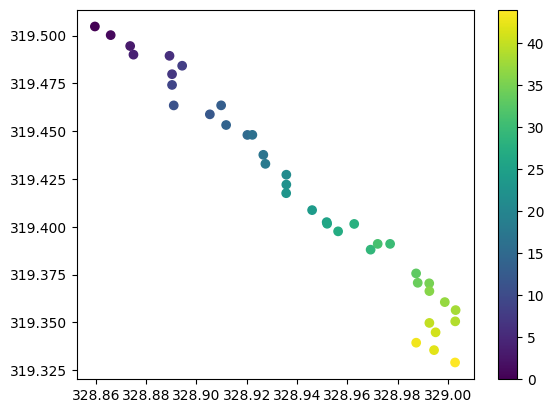

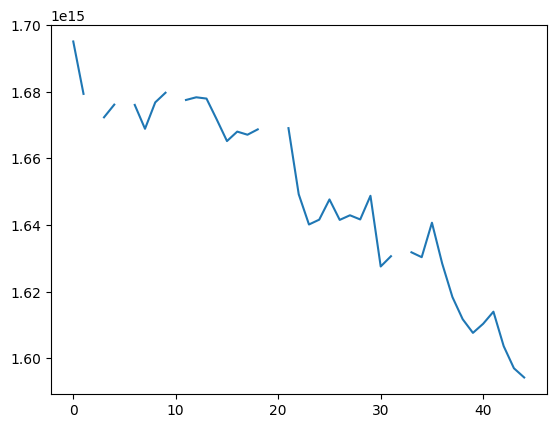

In [276]:
plt.figure()
plt.scatter(pos_history[:, 0], pos_history[:, 1], c=x)
plt.colorbar()
plt.show()


plt.figure()
plt.plot(mass_history)
plt.show()

In [148]:
nsnap0 = 944
k = cats[nsnap0]["hid_to_array_index"][hid]
pos = cats[nsnap0]["cartesian_pos"][k]

In [166]:
nsnap = 939
cats[nsnap0]["dist"][k]
indxs = cats[nsnap].select_in_box(pos, 5)
nearby_pos = cats[nsnap]["cartesian_pos"][indxs]
nearby_mass = cats[nsnap]["summed_mass"][indxs]

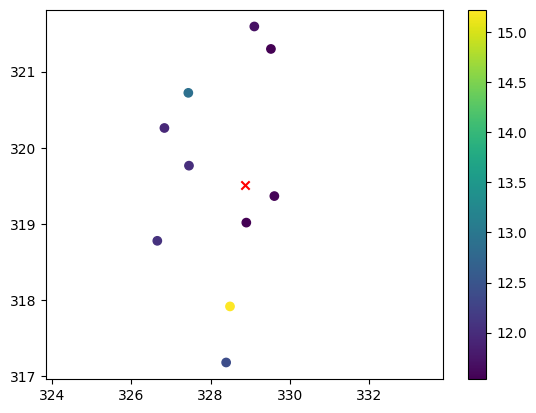

In [167]:
plt.figure()
plt.scatter(nearby_pos[:, 0], nearby_pos[:, 1], c=np.log10(nearby_mass))
plt.colorbar()

plt.scatter(pos[0], pos[1], c="r", marker="x")
plt.xlim(pos[0] - 5, pos[0] + 5)
plt.show()

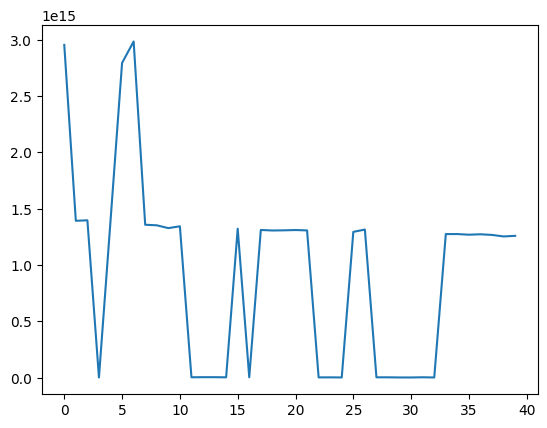

In [50]:
plt.figure()
plt.plot(mass_history)

plt.show()

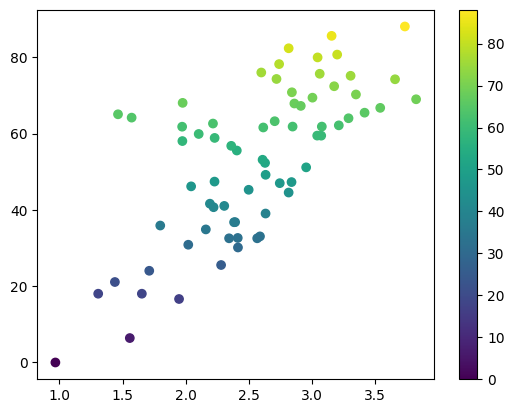

In [51]:
plt.figure()
plt.scatter(dist, rank, c=rank)
plt.colorbar()


plt.show()

In [147]:
dist

array([0.03469291, 1.4941071 , 1.6137327 , 1.9338818 , 1.9451369 ,
       1.9745505 , 2.1557822 , 2.1732695 , 2.1866972 , 2.188077  ,
       2.1966248 , 2.2173362 , 2.2315993 , 2.2622092 , 2.3083584 ,
       2.3235521 , 2.3334928 , 2.3339765 , 2.3409498 , 2.3531873 ,
       2.3956246 , 2.4191911 , 2.4279647 , 2.44543   , 2.4778795 ,
       2.4828646 , 2.4840972 , 2.5520175 , 2.5533767 , 2.5614178 ,
       2.5633898 , 2.569979  , 2.585207  , 2.6075015 , 2.6134186 ,
       2.6162403 , 2.6280391 , 2.6483216 , 2.6745644 , 2.675266  ,
       2.7104652 , 2.710785  , 2.717791  , 2.723212  , 2.7351549 ,
       2.7434163 , 2.760779  , 2.786919  , 2.8479278 , 2.855215  ,
       2.8956635 , 2.9201431 , 2.9495463 , 2.9762506 , 3.0421073 ,
       3.051291  , 3.1273162 , 3.2203753 , 3.2434456 , 3.3662832 ,
       3.4216032 , 3.4361768 , 3.4840217 , 3.5633564 , 3.9444454 ],
      dtype=float32)

In [144]:
np.log10(dx)

array([15.143617 , 11.506105 , 12.061865 , 11.754903 , 12.1637535,
       11.706644 , 11.527555 , 11.81453  , 12.305587 , 12.008193 ,
       12.468391 , 12.135068 , 12.20031  , 12.3106165, 12.231938 ,
       11.548329 , 12.199055 , 12.237394 , 12.008322 , 12.201574 ,
       11.60354  , 12.199569 , 11.6475315, 12.25819  , 12.761718 ,
       12.20017  , 12.319948 , 11.594081 , 12.582169 , 12.207142 ,
       12.232144 , 12.207256 , 12.191118 , 12.230139 , 12.195937 ,
       12.181732 , 12.241584 , 11.854617 , 12.172837 , 11.583755 ,
       11.785564 , 12.170507 , 12.247758 , 12.217982 , 12.198726 ,
       12.500331 , 12.096592 , 11.642915 , 12.206478 , 12.189644 ,
       12.199734 , 12.29456  , 13.210453 , 12.040288 , 12.19934  ,
       11.566858 , 11.664642 , 12.346448 , 11.688704 , 12.551069 ,
       12.198501 , 12.084832 , 12.190776 , 12.184218 , 12.298596 ],
      dtype=float32)

In [143]:
np.log10(mass)

15.47017

In [140]:
np.abs(np.log10(dx / mass))

array([0.3265535, 3.9640648, 3.408305 , 3.7152677, 3.3064172, 3.7635257,
       3.9426146, 3.6556396, 3.1645837, 3.4619775, 3.001779 , 3.3351023,
       3.2698607, 3.1595533, 3.2382321, 3.9218407, 3.2711155, 3.2327757,
       3.461849 , 3.2685957, 3.8666298, 3.2706015, 3.8226388, 3.21198  ,
       2.7084525, 3.2700012, 3.1502216, 3.876089 , 2.888002 , 3.263028 ,
       3.2380261, 3.262914 , 3.279052 , 3.2400315, 3.2742333, 3.2884378,
       3.2285862, 3.615553 , 3.297333 , 3.8864155, 3.684606 , 3.299663 ,
       3.2224126, 3.252188 , 3.2714448, 2.9698398, 3.3735788, 3.8272555,
       3.2636924, 3.2805262, 3.2704363, 3.1756098, 2.2597172, 3.4298823,
       3.2708306, 3.9033115, 3.8055282, 3.1237218, 3.7814672, 2.9191008,
       3.27167  , 3.3853385, 3.2793946, 3.2859516, 3.1715744],
      dtype=float32)

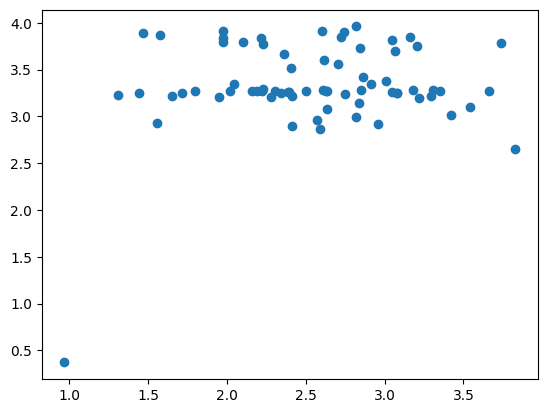

In [107]:
plt.figure()
plt.scatter(dist, dm)
plt.show()

In [133]:
pcat = csiborgtools.read.CSiBORGPHEWCatalogue(
    940, 7468, paths, bounds={"dist": (None, 155.5), "is_main": True})

In [134]:
k = np.argmax(pcat["summed_mass"])

In [135]:
# center = pcat["cartesian_pos"][k]

In [136]:
indxs = pcat.select_in_box(center, 10)

In [137]:
pos = pcat["cartesian_pos"][indxs]
mass = np.log10(pcat["summed_mass"][indxs])

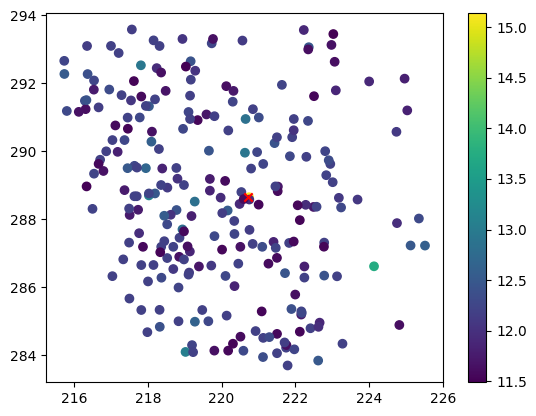

In [138]:
plt.figure()
plt.scatter(pos[:, 0], pos[:, 1], c=mass)
plt.colorbar()
plt.scatter(center[0], center[1], c="r", marker="x")


plt.show()

In [55]:
pcat["is_main"].sum() / len(pcat)

0.34072953251081034

In [46]:
pcat.keys()

['940/index',
 '940/mass_cl',
 '940/parent',
 '940/summed_mass',
 '940/ultimate_parent',
 '940/x',
 '940/y',
 '940/z',
 'cartesian_pos',
 'spherical_pos',
 'dist']

In [42]:
x = pcat["mass_cl"]

In [43]:
y = pcat["summed_mass"]

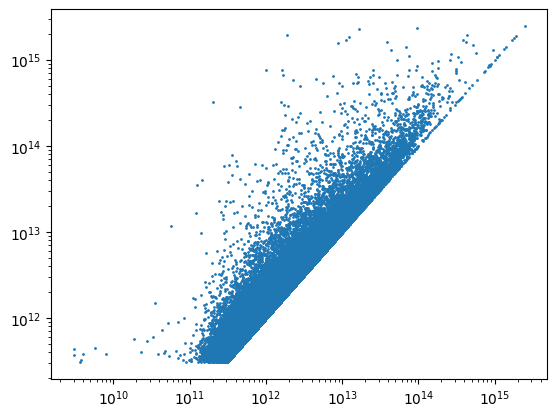

In [44]:
plt.figure()
plt.scatter(x, y, s=1)

plt.xscale("log")
plt.yscale("log")
plt.show()

In [23]:
indxs = pcat.select_in_box([338.85, 338.85, 338.85], 40, False)

In [24]:
pos = pcat["cartesian_pos"][indxs]

# indxs

In [26]:
)

AttributeError: 'list' object has no attribute 'keys'

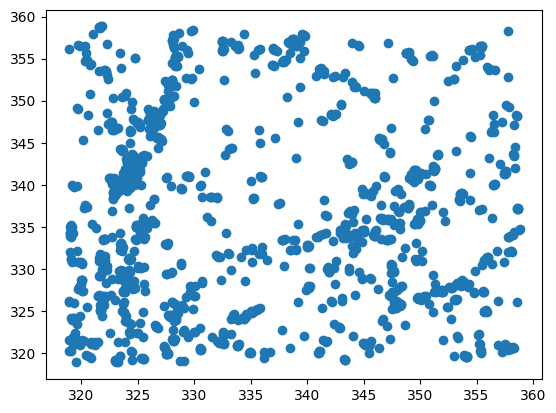

In [25]:
plt.figure()
plt.scatter(pos[:, 0], pos[:, 2])

plt.show()

In [105]:
clumparr = reader.read_phew_clumps(951, 7444, True)

# clindex = clumparr['index']
# clindex_to_array_index = {clindex[i]: i for i in range(clindex.size)}

In [103]:
x, y = reader.find_parents(clumparr, verbose=True)

Ultimate clump: 100%|██████████| 541043/541043 [00:00<00:00, 1486022.37it/s]


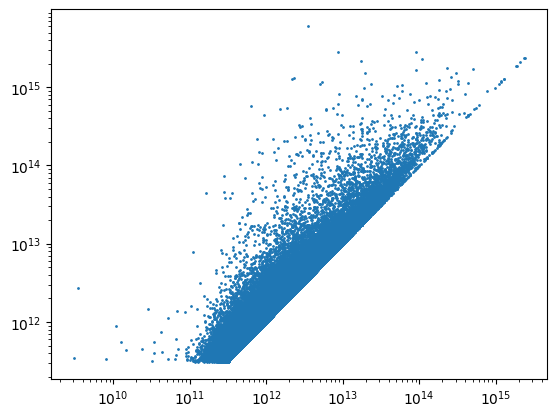

In [98]:
m = clumparr["index"] == clumparr["parent"]

plt.figure()
plt.scatter(clumparr["mass_cl"][m], y[m], s=1)

plt.xscale('log')
plt.yscale('log')

plt.show()

In [55]:
clindex = clumparr["index"]
parindex = clumparr["parent"]

clindex_to_array_index = {clindex[i]: i for i in range(clindex.size)}

In [70]:
i = 2333

cl = clindex[i]
par = parindex[i]
print(cl, par)

while cl != par:
    print(cl, par)

    element = clindex_to_array_index[par]

    cl = clindex[element]
    par = parindex[element]
    
cl, par

74641 57778
74641 57778
57778 57675


(57675, 57675)

In [75]:
clumparr[1338]

(57675, 0, 57675, 2235., 328.36127, 247.63182, 338.77762, 80.28267, 227150.55, 515.31525, 2.6499586e+12, 209.85902)

In [74]:
clindex_to_array_index[57675]

1338

In [57]:
cl, par

(16, 16)

In [49]:
clumparr[92]

(283, 0, 244, 3475., 330.3978, 200.27946, 299.4979, 80.01514, 166588.81, 533.9489, 5.616282e+12, 34.512917)

In [53]:
clindex_to_array_index[244]

66

In [54]:
clumparr[66]

(244, 1, 16, 2946., 330.4896, 200.48395, 299.27054, 81.122246, 184821.58, 539.8623, 4.571406e+12, 38.29027)

In [44]:
clumparr[]

(283, 0, 244, 3475., 330.3978, 200.27946, 299.4979, 80.01514, 166588.81, 533.9489, 5.616282e+12, 34.512917)

In [47]:
clindex_to_array_index[16]

13

In [48]:
clumparr[13]

(16, 0, 16, 6257., 330.06946, 200.00058, 299.66724, 80.11476, 782089.5, 536.5994, 9.229422e+12, 107.78266)

In [26]:
x[0] == clumparr["index"]

array([ True, False, False, ..., False, False, False])

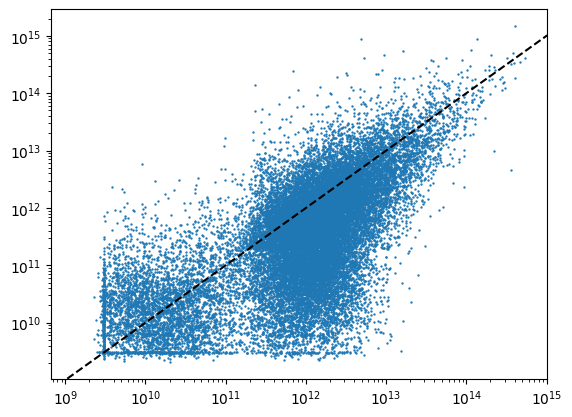

In [31]:
m = clumparr["index"] == clumparr["parent"]

plt.figure()
plt.scatter(clumparr["mass_cl"][~m], y[~m], s=0.5)

plt.axline((1e12, 1e12), slope=1, color="black", linestyle="--")

plt.xscale("log")
plt.yscale("log")

plt.show()

In [71]:
clindex_to_array_index = {clindex[i]: i for i in range(clindex.size)}

In [ ]:
a

In [110]:
clumparr2 = reader.read_phew_clumps(951, 7444, True)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
 73%|███████▎  | 395059/541043 [00:22<00:08, 17753.93it/s]

: 

In [109]:
m.sum() / m.size

0.339305748341629

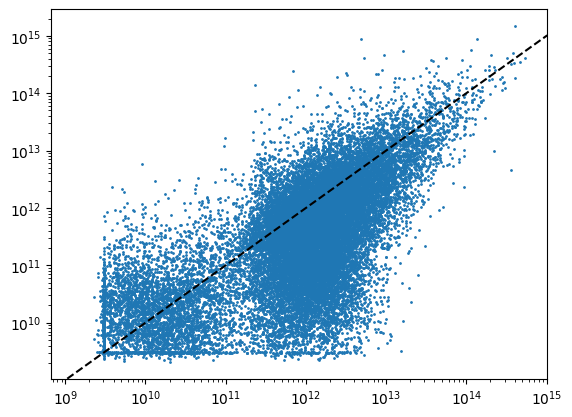

In [107]:
plt.figure()

m = clumparr2["index"] == clumparr2["parent"]


# plt.scatter(clumparr2["mass_cl"][m], clumparr2["summed_mass"][m], s=1)
plt.scatter(clumparr2["mass_cl"][~m], clumparr2["summed_mass"][~m], s=1)

plt.axline((1e12, 1e12), slope=1, color="black", linestyle="--")


plt.xscale("log")
plt.yscale("log")


plt.show()

In [83]:
clindex

array([       1,        2,        3, ..., 21824378, 21824463, 21825308],
      dtype=int32)

In [86]:
par = 21824378

%timeit clindex_to_array_index[par]

1.22 µs ± 15 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [85]:
clindex_to_array_index[par]

541040

In [87]:
%timeit numpy.where(clindex == par)[0][0]

2.69 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
numpy.where(clumparr["index"] == 3)[0][0]

2

In [25]:
def is_sorted_np(arr):
    return np.all(arr[:-1] <= arr[1:])

In [29]:
from numba import jit

In [47]:
def is_sorted(arr):
    for i in range(1, len(arr)):
        if arr[i-1] > arr[i]:
            return False
    return True

@jit(nopython=True, boundscheck=False, fastmath=True)
def is_sorted2(arr):
    for i in range(1, len(arr)):
        if arr[i-1] > arr[i]:
            return False
    return True

In [49]:
is_sorted2(clumparr["index"])

True

In [28]:
%timeit is_sorted_np(clumparr["index"])

2.59 ms ± 85.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
ks = np.argsort(clumparr["index"])

In [24]:
np.alltrue(clumparr["index"][ks] == clumparr["index"])

True

In [10]:
reader.find_parents(clumparr, verbose=True)

Ultimate clump:   6%|▌         | 33740/541043 [01:01<15:18, 552.21it/s] 


KeyboardInterrupt: 